In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [46]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [47]:
x_train=train_datagen.flow_from_directory(r"C:\Users\kousi\Downloads\IBM\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [8]:
x_test=test_datagen.flow_from_directory(r'C:\Users\kousi\Downloads\IBM\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set',target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 3416 images belonging to 9 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [10]:
model=Sequential()

In [11]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Flatten())

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [16]:
model.add(Dense(9,activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
len(x_train)

475

In [19]:
1238/24

51.583333333333336

In [20]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
475/475 [==============================] - 630s 1s/step - loss: 1.1267 - accuracy: 0.6432 - val_loss: 0.5833 - val_accuracy: 0.7922
Epoch 2/10
475/475 [==============================] - 307s 646ms/step - loss: 0.5110 - accuracy: 0.8206 - val_loss: 0.5101 - val_accuracy: 0.8071
Epoch 3/10
475/475 [==============================] - 152s 319ms/step - loss: 0.3986 - accuracy: 0.8602 - val_loss: 0.4361 - val_accuracy: 0.8308
Epoch 4/10
475/475 [==============================] - 154s 323ms/step - loss: 0.3617 - accuracy: 0.8741 - val_loss: 0.2830 - val_accuracy: 0.8972
Epoch 5/10
475/475 [==============================] - 142s 298ms/step - loss: 0.3079 - accuracy: 0.8922 - val_loss: 0.4575 - val_accuracy: 0.8390
Epoch 6/10
475/475 [==============================] - 157s 330ms/step - loss: 0.2872 - accuracy: 0.9000 - val_loss: 0.1830 - val_accuracy: 0.9324
Epoch 7/10
475/475 [==============================] - 147s 309ms/step - loss: 0.2357 - accuracy: 0.9147 - val_loss: 0.3386 - va

In [21]:
model.save('vegetabledata.h5')

In [22]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('vegetabledata.h5')

In [24]:
img=image.load_img(r"C:\Users\kousi\Downloads\IBM\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set\Pepper,_bell___healthy\0dd09705-5593-4d01-9a9b-c1d5857daf92___JR_HL 8212.jpg")

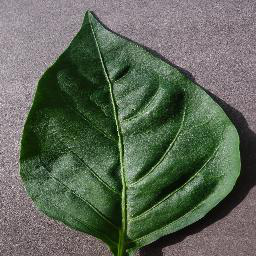

In [25]:
img

In [26]:
x=image.img_to_array(img)

In [27]:
img=image.load_img(r"C:\Users\kousi\Downloads\IBM\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set\Pepper,_bell___healthy\0dd09705-5593-4d01-9a9b-c1d5857daf92___JR_HL 8212.jpg",target_size=(128,128))

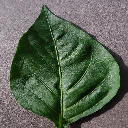

In [28]:
img

In [29]:
x=image.img_to_array(img)

In [30]:
x

array([[[138., 131., 138.],
        [157., 150., 157.],
        [162., 155., 162.],
        ...,
        [130., 119., 127.],
        [101.,  90.,  98.],
        [162., 151., 159.]],

       [[153., 146., 153.],
        [135., 128., 135.],
        [153., 146., 153.],
        ...,
        [145., 134., 142.],
        [115., 104., 112.],
        [117., 106., 114.]],

       [[143., 136., 143.],
        [160., 153., 160.],
        [139., 132., 139.],
        ...,
        [135., 124., 132.],
        [171., 160., 168.],
        [140., 129., 137.]],

       ...,

       [[ 85.,  73.,  75.],
        [104.,  92.,  94.],
        [120., 108., 110.],
        ...,
        [100.,  84.,  85.],
        [126., 110., 111.],
        [145., 129., 130.]],

       [[131., 119., 121.],
        [130., 118., 120.],
        [133., 121., 123.],
        ...,
        [117., 101., 102.],
        [114.,  98.,  99.],
        [142., 126., 127.]],

       [[103.,  91.,  93.],
        [140., 128., 130.],
        [116., 1

In [31]:
x=np.expand_dims(x,axis=0)

In [32]:
x

array([[[[138., 131., 138.],
         [157., 150., 157.],
         [162., 155., 162.],
         ...,
         [130., 119., 127.],
         [101.,  90.,  98.],
         [162., 151., 159.]],

        [[153., 146., 153.],
         [135., 128., 135.],
         [153., 146., 153.],
         ...,
         [145., 134., 142.],
         [115., 104., 112.],
         [117., 106., 114.]],

        [[143., 136., 143.],
         [160., 153., 160.],
         [139., 132., 139.],
         ...,
         [135., 124., 132.],
         [171., 160., 168.],
         [140., 129., 137.]],

        ...,

        [[ 85.,  73.,  75.],
         [104.,  92.,  94.],
         [120., 108., 110.],
         ...,
         [100.,  84.,  85.],
         [126., 110., 111.],
         [145., 129., 130.]],

        [[131., 119., 121.],
         [130., 118., 120.],
         [133., 121., 123.],
         ...,
         [117., 101., 102.],
         [114.,  98.,  99.],
         [142., 126., 127.]],

        [[103.,  91.,  93.],
       

In [33]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 1s 772ms/step


In [35]:
k=x_train.class_indices

In [40]:
l=[]
for i in k:
    l.append(i)
print(l)

['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot']


In [41]:
index=['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot']

In [42]:
index[y[0]]

'Pepper,_bell___healthy'

In [43]:
img=image.load_img(r"C:\Users\kousi\Downloads\IBM\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set\Pepper,_bell___healthy\0dd09705-5593-4d01-9a9b-c1d5857daf92___JR_HL 8212.jpg",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 42ms/step


'Pepper,_bell___healthy'